# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

---



This lab will be based upon t-SNE which is a dimensionality reduction algorithm used to visualize high dimensional datasets.

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

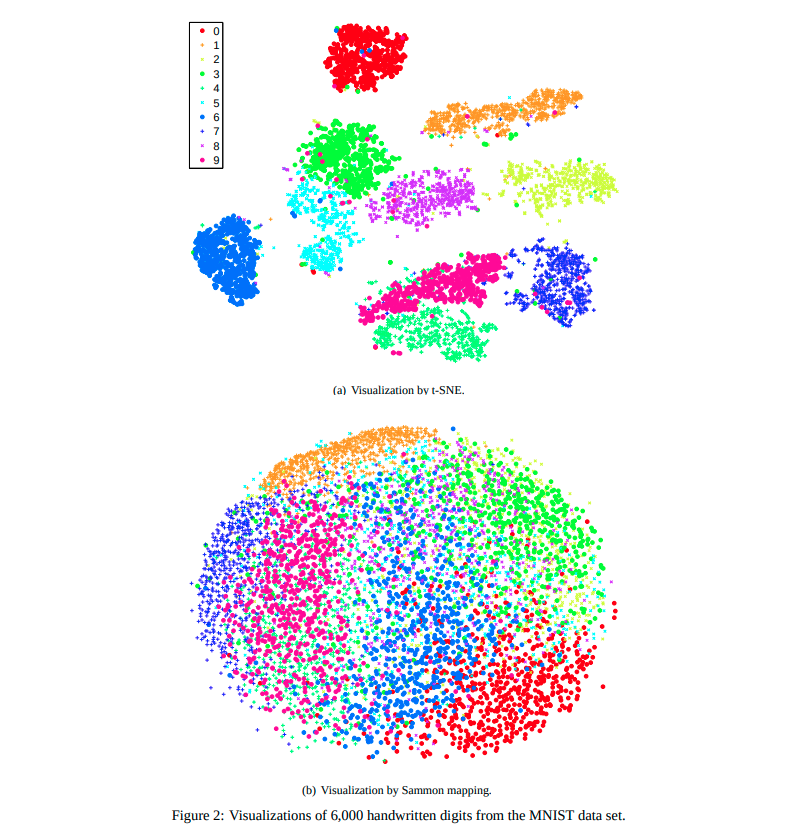

**What is t-SNE? (Simplified)**

- t-SNE is like a "magic map" for data. Imagine you have a huge, complex 3D sculpture, and you want to draw it on a flat piece of paper. t-SNE helps you draw it in a way that keeps the important relationships between parts of the sculpture intact.
- It’s non-linear, meaning it can capture curves, twists, and clusters that linear methods (like PCA) might miss.

**Why Use t-SNE?**

- Visualization: Helps you "see" high-dimensional data in 2D or 3D.
- Exploration: Useful for spotting patterns, clusters, or outliers in data.
- Preprocessing: Sometimes used before clustering algorithms to get a sense of how many clusters might exist

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

**What is Perplexity? (Simplified)**

Perplexity is like a "knob" that controls how t-SNE balances attention between local and global patterns in your data.
- Low perplexity (e.g., 5): t-SNE focuses on tiny, local clusters. Good for detailed, fine-grained structure.
- High perplexity (e.g., 50): t-SNE looks at broader, global patterns. Good for seeing the "big picture."

**Example: Choosing Perplexity**

- If your dataset has 500 points, try perplexity values between 5 and 50.
- If you set perplexity to 200, t-SNE might get confused because it’s trying to consider too many neighbors at once.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

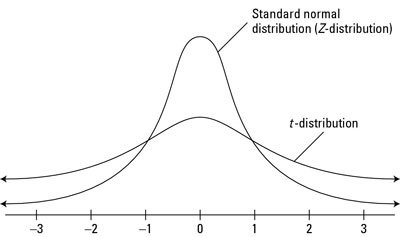

**Analogy: t-SNE as a "Social Network"**

Imagine your data points are people at a party.

- Step 1: In the "real world" (high-dimensional space), you measure how close people are standing (using a Gaussian distribution).
- Step 2: You try to rearrange everyone in a smaller room (2D/3D space) so that the distances between friends (similar points) stay the same.
- Step 3: You use a "cost function" (KL divergence) to measure how well you’ve preserved these relationships. The goal is to minimize this cost.

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

**Tips for Using sklearn.manifold.TSNE**

- n_components: Usually 2 (for 2D plots) or 3 (for 3D).
- perplexity: Start with 30. Adjust based on your dataset size.
- n_iter: Start with 1000. Increase if the plot looks unstable.
- method: Use 'barnes_hut' for large datasets (faster). Use 'exact' for small datasets (more accurate).

In [1]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



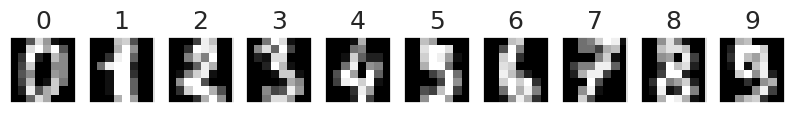

In [5]:
nrows, ncols = 1, 10
plt.figure(figsize=(10,5))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

**Interpreting the MNIST t-SNE Plot**

Each color represents a digit (0-9).
Clusters: Digits that are similar (e.g., 4 and 9) might appear closer together.
Outliers: Points far from their cluster might be miswritten digits or anomalies.

**Exercise: Try This!**

Run t-SNE on a subset of MNIST (e.g., only digits 3, 5, and 8).
Observe how the clusters change when you adjust perplexity from 5 to 50.



In [6]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [7]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



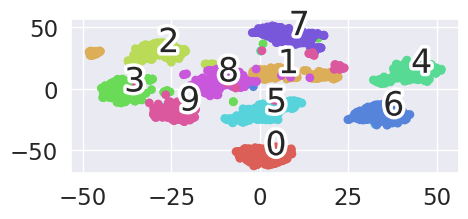

(<Figure size 500x200 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e763a3f0410>)

In [11]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(5, 2))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-50, 25)
    plt.ylim(-50, 25)
    ax.axis('on')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


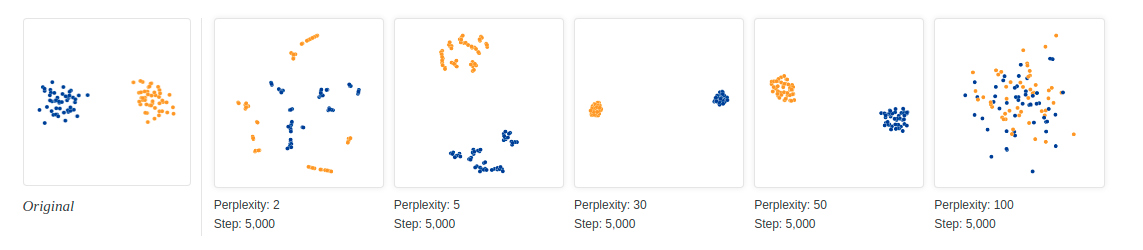

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

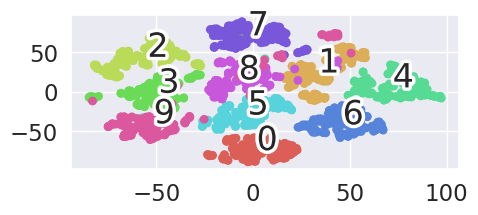

(<Figure size 500x200 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e763a0c7320>)

In [12]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

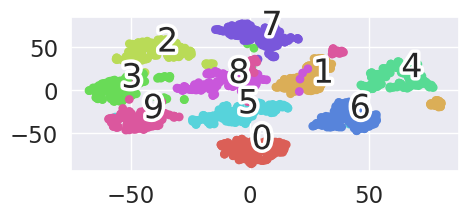

(<Figure size 500x200 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e7636780e90>)

In [15]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=10).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

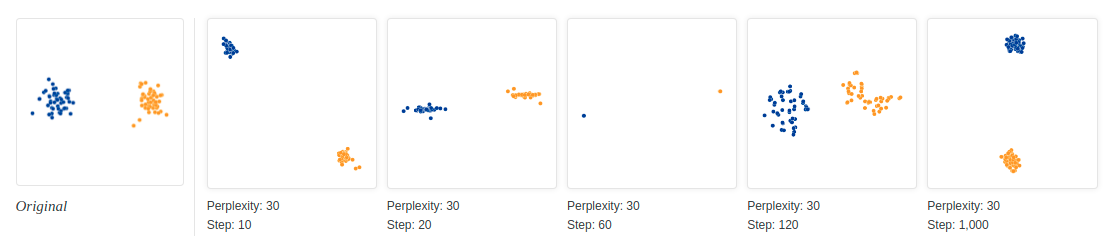

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


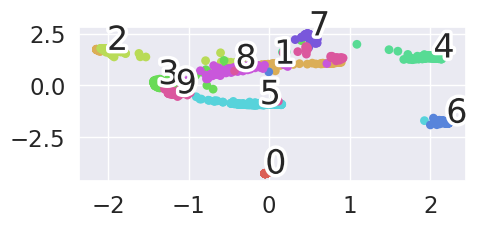

(<Figure size 500x200 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e763a082690>)

In [18]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


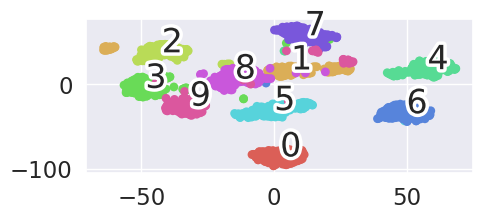

(<Figure size 500x200 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e7635b83260>)

In [17]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

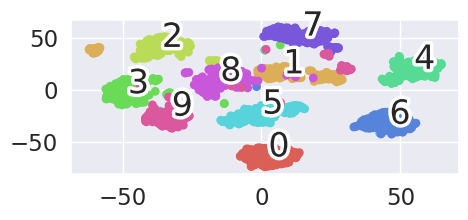

(<Figure size 500x200 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e7635a26930>)

In [19]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


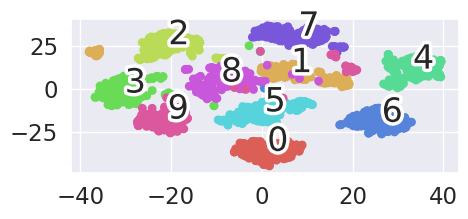

(<Figure size 500x200 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e7635ab3d40>)

In [20]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 30
number_iterations = 550
method = "exact"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

### t-SNE vs. PCA: Key Differences

| Feature               | t-SNE                          | PCA                          |
|-----------------------|--------------------------------|------------------------------|
| **Linearity**         | Non-linear                     | Linear                      |
| **Goal**              | Preserves local relationships  | Preserves global variance    |
| **Use Case**          | Visualization, exploration     | Dimensionality reduction, noise filtering |
| **Computational Cost**| Higher (O(N²) for exact)       | Lower (O(N³) for SVD)       |

**When to Use Which?**
- Use **PCA** if you want a fast, linear overview of your data.
- Use **t-SNE** if you want to explore local clusters or non-linear patterns.


**Limitations of t-SNE**

- Computationally Expensive: Slower than PCA, especially for large datasets.
- Sensitive to Hyperparameters: Results can vary a lot with perplexity, iterations, and random seed.
- Not for Out-of-Sample Data: t-SNE doesn’t easily generalize to new data points. You need to rerun it for new data.
- Global Structure: t-SNE focuses on local patterns, so global distances might not be preserved.

**Example: t-SNE Pitfall**

If you run t-SNE twice on the same data with different random seeds, you might get different plots. This is normal but can be confusing!

**When to Use t-SNE**

- You have high-dimensional data (e.g., images, text, genomics).
- You want to explore or visualize clusters.
- You’re okay with some variability in results.

**When to Avoid t-SNE**

- You need a deterministic or scalable solution.
- You want to reduce dimensions for machine learning (use PCA or UMAP instead).



---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?    
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?    
d. Can you comment on which one of the two is computationally more expensive?

2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


**Answers:**

**1)**

a.
PCA is a linear dimensionality-reduction method.
t-SNE is a non-linear method.

b.
Because t-SNE is non-linear, it can capture curved, complex, and clustered structures in data.
PCA cannot do this because it only looks for straight-line (linear) directions of maximum variance.

c.
PCA preserves global structure → points far apart in high-dimensions stay far apart in low-dimensions.
t-SNE preserves local structure → it tries to keep neighbourhoods intact, even if the global shape gets distorted.

d.
t-SNE is more computationally expensive.
PCA is very fast because it uses simple linear algebra operations.

**2)**

t-SNE has O(N²) time and memory complexity (because it computes pairwise similarities).

As the number of data points N grows, t-SNE becomes slow and memory-heavy.

Dimensionality affects runtime too, but dataset size affects it much more.

**3)**

Very slow for large datasets due to O(N²) complexity.

Results depend on hyperparameters (perplexity, learning rate) and can change easily.

Not suitable for new/streaming data → cannot reuse the model to embed new points.





---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


